### Research questions:
1. Do females read more than males?
2. Do gender, age, education, income, or race influence how much a person reads?

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Reading habits

In [ ]:
reading_habits_df = pd.read_csv('/content/drive/MyDrive/data/reading-habits.csv') #4 years old: https://www.kaggle.com/datasets/vipulgote4/reading-habit-dataset
reading_habits_df.head(2)

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes


In [ ]:
reading_habits_df.shape

(2832, 14)

In [ ]:
reading_habits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Age                                                  2832 non-null   int64 
 1   Sex                                                  2832 non-null   object
 2   Race                                                 2832 non-null   object
 3   Marital status?                                      2832 non-null   object
 4   Education                                            2774 non-null   object
 5   Employement                                          2832 non-null   object
 6   Incomes                                              2832 non-null   object
 7   How many books did you read during last 12months?    2832 non-null   int64 
 8   Read any printed books during last 12months?         2442 non-null   object
 9

In [ ]:
#change NaN to 'Don’t know'
reading_habits_df['Education'].unique()

array(['College graduate', 'High school graduate',
       'High school incomplete', 'Some college, no 4-year degree',
       'Post-graduate training/professional school after college',
       'Technical, trade or vocational school AFTER high school', nan,
       'Don’t know'], dtype=object)

In [ ]:
# #change NaN to 'Don’t know'
# reading_habits_df['Read any printed books during last 12months?'].unique()
# reading_habits_df['Read any audiobooks during last 12months?'].unique()
# reading_habits_df['Read any e-books during last 12months?'].unique()

In [ ]:
# #change NaN to 'Got the book some other way' - do i care about this column? what do 8 and 9 mean? only about last book read
# reading_habits_df['Last book you read, you…'].unique()
# reading_habits_df['Last book you read, you…'].value_counts()

In [ ]:
#typo in one of the answer options: 9$100,000 to under $150,000

reading_habits_df['Incomes'].value_counts()

Incomes
$100,000 to under $150,000     530
$50,000 to under $75,000       394
$75,000 to under $100,000      316
Refused                        291
$30,000 to under $40,000       265
$20,000 to under $30,000       238
$10,000 to under $20,000       216
9$100,000 to under $150,000    212
$40,000 to under $50,000       207
Less than $10,000              163
Name: count, dtype: int64

### Data Cleaning

In [ ]:
# reading_habits_df['Employement'].value_counts()

- drop columns (11-13)
- NaNs
- fix 'Incomes' column: change "9$100,000 to under $150,000" to "$100,000 to under $150,000"
- rename employment column ('Employement')



In [ ]:
reading_habits_df.head(2)

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes


In [ ]:
#drop columns
cols_to_drop = ['Last book you read, you…',	'Do you happen to read any daily news or newspapers?',	'Do you happen to read any magazines or journals?']

clean_df = reading_habits_df.copy()
clean_df = clean_df.drop(cols_to_drop, axis=1)
#change NaN to 'Don’t know'
nan_cols = ['Education', 'Read any printed books during last 12months?', 'Read any audiobooks during last 12months?', 'Read any e-books during last 12months?']
clean_df[nan_cols] = clean_df[nan_cols].fillna('Don’t know')
clean_df.head(2)
# clean_df.info()

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes


In [ ]:
#typo in one of the answer options: 9$100,000 to under $150,000 and format messed up
reading_habits_clean = clean_df.copy() # tracking changes
reading_habits_clean['Incomes'] = reading_habits_clean['Incomes'].replace('9$100,000 to under $150,000', '$100,000 to under $150,000')
#reading_habits_clean['Incomes'].value_counts()

def fix_format(x):
  if '$' in x:
    return x.replace('$','')
  else:
    return x

reading_habits_clean['Incomes'] = reading_habits_clean['Incomes'].apply(fix_format)
# reading_habits_clean.Incomes.value_counts()

In [ ]:
reading_habits_clean = reading_habits_clean.rename(columns={'Employement':'Employment'})
# reading_habits_clean.head(2)
#reading_habits_clean.Incomes.value_counts()

In [ ]:
reading_habits_clean.sample(5)

,Age,Sex,Race,Marital status?,Education,Employment,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?
1235,37,Male,White,Married,College graduate,Employed full-time,"100,000 to under 150,000",10,Yes,Yes,No
22,78,Female,White,Widowed,"Technical, trade or vocational school AFTER hi...",Retired,"10,000 to under 20,000",97,Yes,No,No
2437,16,Female,White,Never been married,High school incomplete,Not employed for pay,"30,000 to under 40,000",1,Yes,No,No
2806,27,Male,White,Single,High school incomplete,Employed full-time,"30,000 to under 40,000",0,Don’t know,Don’t know,Don’t know
1572,21,Male,White,Never been married,"Some college, no 4-year degree",Employed part-time,"100,000 to under 150,000",6,Yes,No,Yes


### Age

**Box Plot: Summarizes key statistics (median, quartiles) and highlights outliers**

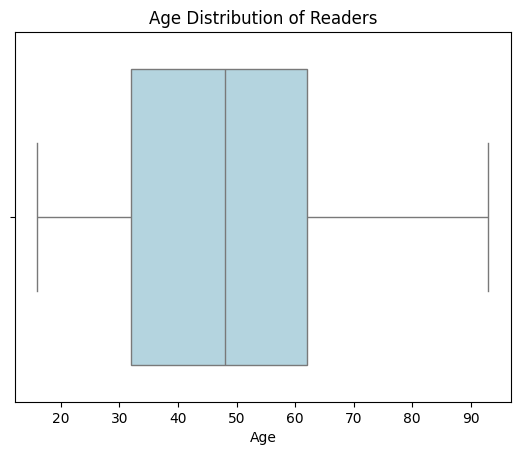

In [ ]:
age = sns.boxplot(data=reading_habits_clean, x='Age', color='lightblue')
plt.title('Age Distribution of Readers')
plt.xlabel('Age')
plt.show()

In [ ]:
reading_habits_clean['Age'].describe()

count    2832.000000
mean       47.276483
std        18.565516
min        16.000000
25%        32.000000
50%        48.000000
75%        62.000000
max        93.000000
Name: Age, dtype: float64

In [ ]:
reading_habits_clean['Age'].mode()

0    50
Name: Age, dtype: int64

**Histogram (sns.histplot): This is a classic choice for showing the distribution of a single variable like age.**

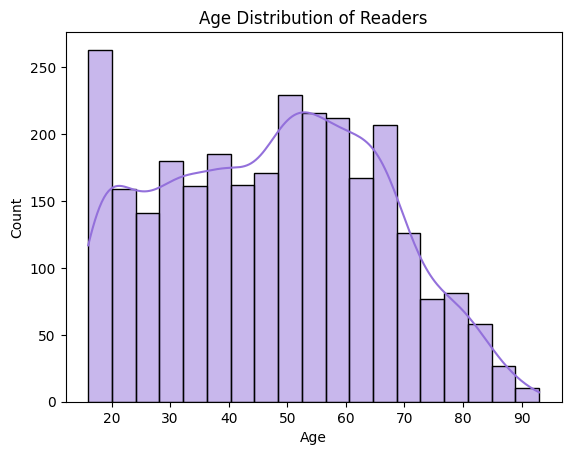

In [ ]:
age_hist = sns.histplot(data=reading_habits_clean, x='Age', kde=True, color='mediumpurple')
plt.title('Age Distribution of Readers')
plt.xlabel('Age')
plt.show()

In [ ]:
#percent of people aged 20-29
twenties = len(reading_habits_clean[(reading_habits_clean['Age']>=20) & (reading_habits_clean['Age'] <30)])
twenties

everyone = len(reading_habits_clean['Age'])
everyone

twenties_perc = twenties/everyone*100
twenties_perc

13.100282485875706

In [ ]:
#percent of people aged 50-60
fifty_sixty = len(reading_habits_clean[(reading_habits_clean['Age']>=50) & (reading_habits_clean['Age'] <=60)])
fifty_sixty

fifty_sixty_perc = fifty_sixty/everyone*100
fifty_sixty_perc

21.574858757062145

### Do females read more than males?


In [ ]:
reading_habits_clean.head()

,Age,Sex,Race,Marital status?,Education,Employment,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?
0,66,Male,Refused,Divorced,College graduate,Retired,"20,000 to under 30,000",97,Yes,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than 10,000",97,Yes,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than 10,000",97,No,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"40,000 to under 50,000",97,Yes,No,Yes
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"10,000 to under 20,000",97,Yes,Yes,No


In [ ]:
gender_count = reading_habits_clean['Sex'].value_counts()
gender_count

Sex
Female    1479
Male      1353
Name: count, dtype: int64

- labels=gender_counts.index: The labels for each section of the pie chart.
- autopct='%1.1f%%': This formats the labels inside the pie chart to show percentages.
- *start*angle=140: The angle by which the start of the pie is rotated, counterclockwise from the x-axis.

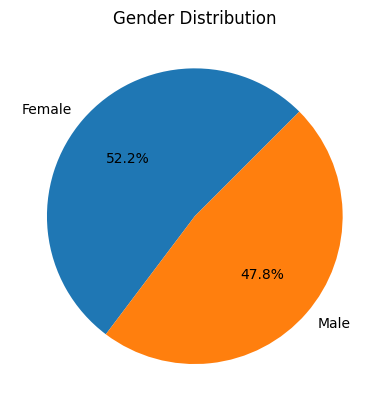

In [ ]:
#gender pie chart
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=45)
plt.title('Gender Distribution')
plt.show()

In [ ]:
reading_habits_clean['How many books did you read during last 12months?'].describe()

count    2832.000000
mean       16.676201
std        23.632071
min         0.000000
25%         2.750000
50%         6.000000
75%        20.000000
max        97.000000
Name: How many books did you read during last 12months?, dtype: float64

In [ ]:
# plt.figure(figsize=(8,4))
# read_count = sns.boxplot(data=reading_habits_clean, x="How many books did you read during last 12months?", color='orchid', showfliers=False)
# ticks=range(0,50,2)
# plt.xticks(ticks)
# plt.title('How many books did you read during last 12 months?')
# read_count.set_xlabel('Number of books read')
# plt.show()

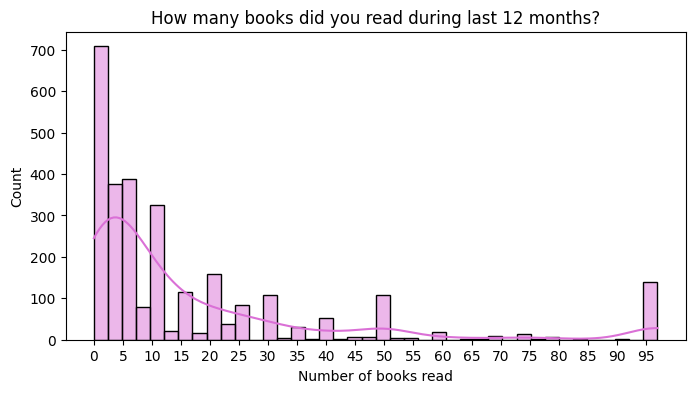

In [ ]:
plt.figure(figsize=(8,4))
read_count = sns.histplot(data=reading_habits_clean, x="How many books did you read during last 12months?", color='orchid', kde=True)
plt.title('How many books did you read during last 12 months?')
read_count.set_xlabel('Number of books read')
ticks=range(0,100,5)
plt.xticks(ticks)
plt.title('How many books did you read during last 12 months?')
plt.show()

In [ ]:
print(reading_habits_clean['How many books did you read during last 12months?'].describe())
print(f"Mode books read: {reading_habits_clean['How many books did you read during last 12months?'].mode()}")

count    2832.000000
mean       16.676201
std        23.632071
min         0.000000
25%         2.750000
50%         6.000000
75%        20.000000
max        97.000000
Name: How many books did you read during last 12months?, dtype: float64
Mode books read: 0    0
Name: How many books did you read during last 12months?, dtype: int64


In [ ]:
sample_size = len(reading_habits_clean)
print(sample_size)
none_read = len(reading_habits_clean[reading_habits_clean['How many books did you read during last 12months?']==0])
print(none_read)

none_read_perc = none_read / sample_size *100
none_read_perc

2832
390


13.771186440677965

In [ ]:
total_books_read = reading_habits_clean['How many books did you read during last 12months?'].sum()
total_books_read

47227

In [ ]:
one_read = reading_habits_clean[reading_habits_clean['How many books did you read during last 12months?']==1]
len(one_read)

149

In [ ]:
high_readers = len(reading_habits_clean[reading_habits_clean['How many books did you read during last 12months?']>=90])
high_readers

141

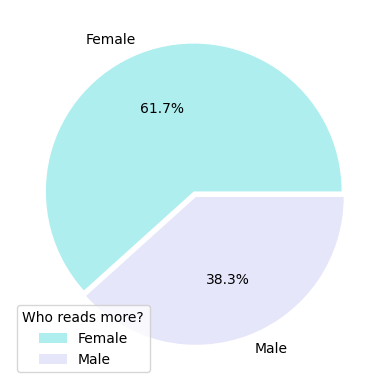

In [ ]:
reading_habits_clean[['Sex', 'How many books did you read during last 12months?']]
female_read = reading_habits_clean[reading_habits_clean['Sex']=='Female']
female_count = female_read['How many books did you read during last 12months?'].sum()
# print(female_count)
male_read = reading_habits_clean[reading_habits_clean['Sex']=='Male']
male_count = male_read['How many books did you read during last 12months?'].sum()
# print(male_count)
# print(reading_habits_clean['How many books did you read during last 12months?'].sum())
# female_count+male_count

mydata = np.array([female_count, male_count])
myexplode = [0.02, 0.02]

plt.pie(mydata, labels = ('Female', 'Male'), autopct='%1.1f%%', colors=['paleturquoise', 'lavender'], explode = myexplode)
plt.legend(title="Who reads more?")
plt.show()

In [ ]:
gender_read = reading_habits_clean.groupby(by='Sex')['How many books did you read during last 12months?'].value_counts()
gender_read

Sex     How many books did you read during last 12months?
Female  0                                                    150
        3                                                    108
        10                                                    94
        20                                                    94
        97                                                    91
                                                            ... 
Male    76                                                     1
        51                                                     1
        26                                                     1
        43                                                     1
        42                                                     1
Name: count, Length: 90, dtype: int64

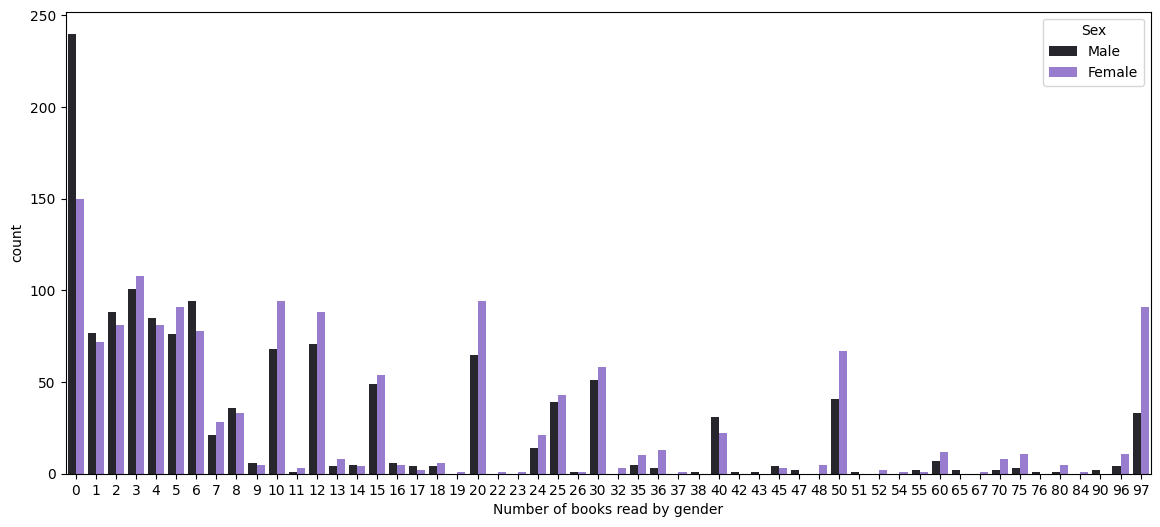

In [ ]:
#do females read more?
plt.figure(figsize=(14,6))
book_count = sns.countplot(data=reading_habits_clean,
                   x="How many books did you read during last 12months?",
                   hue="Sex",
                   palette="dark:mediumpurple")

book_count.set_xlabel('Number of books read by gender')
plt.show()

### 2. Do gender, age, education, income, or race influence how much a person reads?

In [ ]:
readdf = reading_habits_clean[['Education', "How many books did you read during last 12months?"]]
readdf[readdf['Education']=='High school graduate']["How many books did you read during last 12months?"].mean()

12.215116279069768

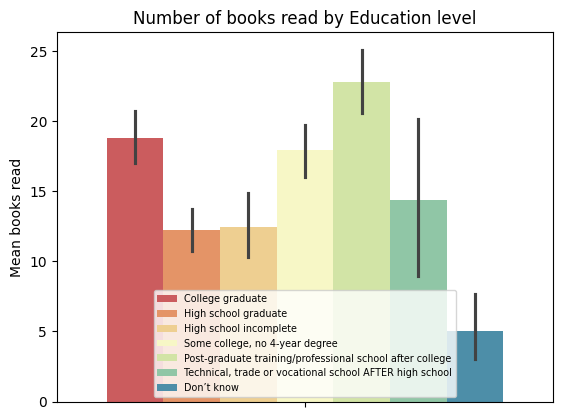

In [ ]:
# plt.figure(figsize=(10,6))
ed_read = sns.barplot(data=reading_habits_clean,
                   y="How many books did you read during last 12months?",
                   hue="Education",
                   palette='Spectral')
# plt.ylim(0,97)
plt.legend(loc='lower center', fontsize='x-small')
ed_read.set_ylabel('Mean books read')
plt.title('Number of books read by Education level')
plt.show()

In [ ]:
# Define Incomes order
ordered_income = [
    'Refused', 'Less than 10,000', '10,000 to under 20,000',
    '20,000 to under 30,000', '30,000 to under 40,000', '40,000 to under 50,000',
    '50,000 to under 75,000', '75,000 to under 100,000', '100,000 to under 150,000'
]

#Reorder df based on ordered_income
income_df = reading_habits_clean.copy()
income_df['Incomes'] = pd.Categorical(income_df['Incomes'], categories=ordered_income, ordered=True)
income_df = income_df.sort_values('Incomes')
# income_df['Incomes'].value_counts()

In [ ]:
# # Income distribution
# sns.histplot(data=income_df, x='Incomes', kde=True, color='orchid')
# plt.xticks(rotation=45, ha='right')  #Rotate x-axis labels 45 degrees, ha = horizontal alignment right
# plt.show()

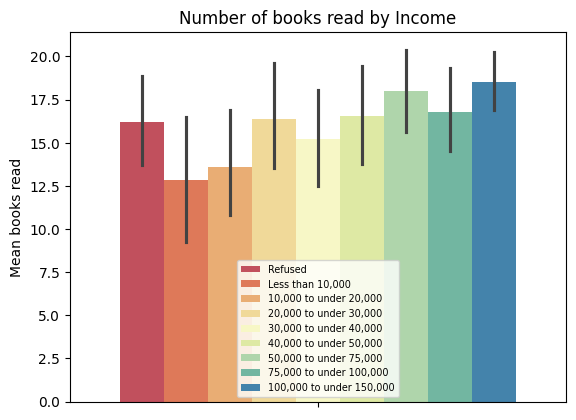

In [ ]:
income_read = sns.barplot(data=income_df,
                   y="How many books did you read during last 12months?",
                   hue="Incomes",
                   palette='Spectral')
plt.legend(loc='lower center', fontsize='x-small')
income_read.set_ylabel('Mean books read')
plt.title('Number of books read by Income')

plt.show()

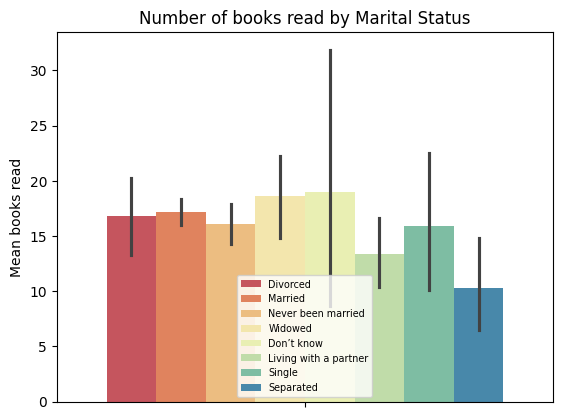

In [ ]:
#reading_habits_clean['Marital status?'].value_counts()

marital_read = sns.barplot(data=reading_habits_clean,
                   y="How many books did you read during last 12months?",
                   hue="Marital status?",
                   palette='Spectral')
plt.legend(loc='lower center', fontsize='x-small')
marital_read.set_ylabel('Mean books read')
plt.title('Number of books read by Marital Status')

plt.show()

In [ ]:
# reading_habits_clean['Marital status?'].value_counts()
# rel_read = reading_habits_clean[reading_habits_clean['Marital status?']=='Living with a partner']
# rel_read
# # rel_count = rel_read['How many books did you read during last 12months?'].describe()
# # rel_count

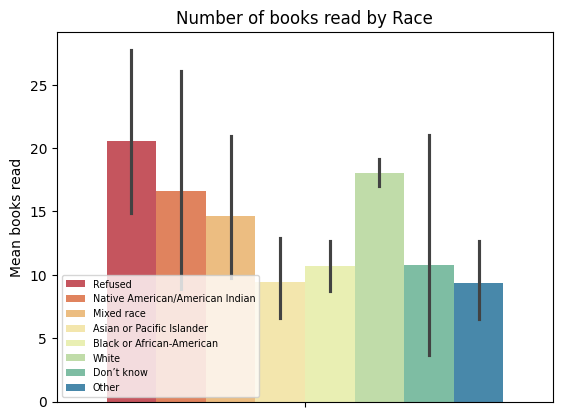

In [ ]:
#race

race_read = sns.barplot(data=reading_habits_clean,
                   y="How many books did you read during last 12months?",
                   hue="Race",
                   palette='Spectral')
plt.legend(loc='lower left', fontsize='x-small')
race_read.set_ylabel('Mean books read')
plt.title('Number of books read by Race')

plt.show()

In [ ]:
# #employment

# emp_read = sns.barplot(data=reading_habits_clean,
#                    y="How many books did you read during last 12months?",
#                    hue="Employment",
#                    palette='Spectral')
# plt.legend(loc='lower center', fontsize='x-small')
# emp_read.set_ylabel('Mean books read')
# plt.title('Number of books read by Employment Status')

# plt.show()

In [ ]:
#books read x age
#create new column

age_df = reading_habits_clean.copy() #tracking changes
age_df.loc[age_df['Age']<20, 'age_group'] = '<20'
age_df.loc[age_df['Age'].between(20,29), 'age_group'] = '20-29'
age_df.loc[age_df['Age'].between(30,39), 'age_group'] = '30-39'
age_df.loc[age_df['Age'].between(40,49), 'age_group'] = '40-49'
age_df.loc[age_df['Age'].between(50,59), 'age_group'] = '50-59'
age_df.loc[age_df['Age'].between(60,69), 'age_group'] = '60-69'
age_df.loc[age_df['Age'].between(70,79), 'age_group'] = '70-79'
age_df.loc[age_df['Age'].between(80,89), 'age_group'] = '80-89'
age_df.loc[age_df['Age']>=90, 'age_group'] = '>90'
age_df.sample(2)

,Age,Sex,Race,Marital status?,Education,Employment,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,age_group
1163,67,Male,White,Married,"Some college, no 4-year degree",Retired,"30,000 to under 40,000",10,Yes,Yes,Yes,60-69
1564,28,Female,White,Never been married,College graduate,Employed full-time,"40,000 to under 50,000",6,Yes,No,Yes,20-29


In [ ]:
#set age group order
# Define age_group order
ordered_ages = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '>90']
#convert ordered_ages into ordered categorical type
age_df['age_group'] = pd.Categorical(age_df['age_group'], categories=ordered_ages, ordered=True)
#sort df by the now ordered age_group column
age_df = age_df.sort_values('age_group')
age_df.head(2)

,Age,Sex,Race,Marital status?,Education,Employment,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,age_group
1415,18,Male,Other,Never been married,High school incomplete,Not employed for pay,"30,000 to under 40,000",6,Yes,Yes,Yes,<20
1118,18,Female,White,Never been married,"Some college, no 4-year degree",Employed part-time,"100,000 to under 150,000",11,Yes,No,No,<20


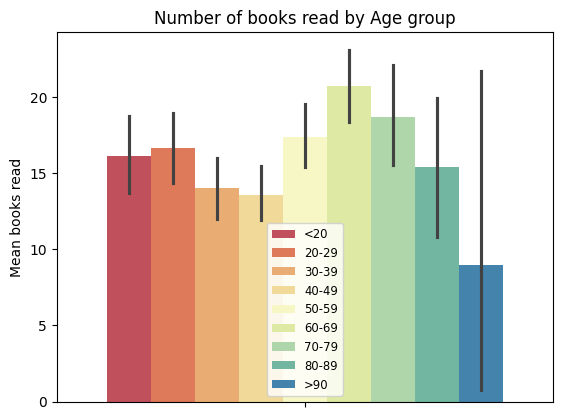

In [ ]:
# plt.figure(figsize=(10,6))
age_read = sns.barplot(data=age_df,
                   y="How many books did you read during last 12months?",
                   hue="age_group",
                   palette='Spectral')
plt.legend(loc='lower center', fontsize='small')
age_read.set_ylabel('Mean books read')
plt.title('Number of books read by Age group')

plt.show()

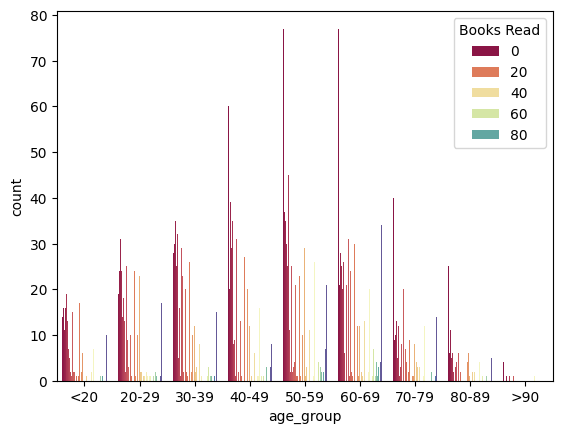

In [ ]:
book_count = sns.countplot(data=age_df,
                   x="age_group",
                   hue="How many books did you read during last 12months?",
                   palette="Spectral")
plt.legend(title='Books Read')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


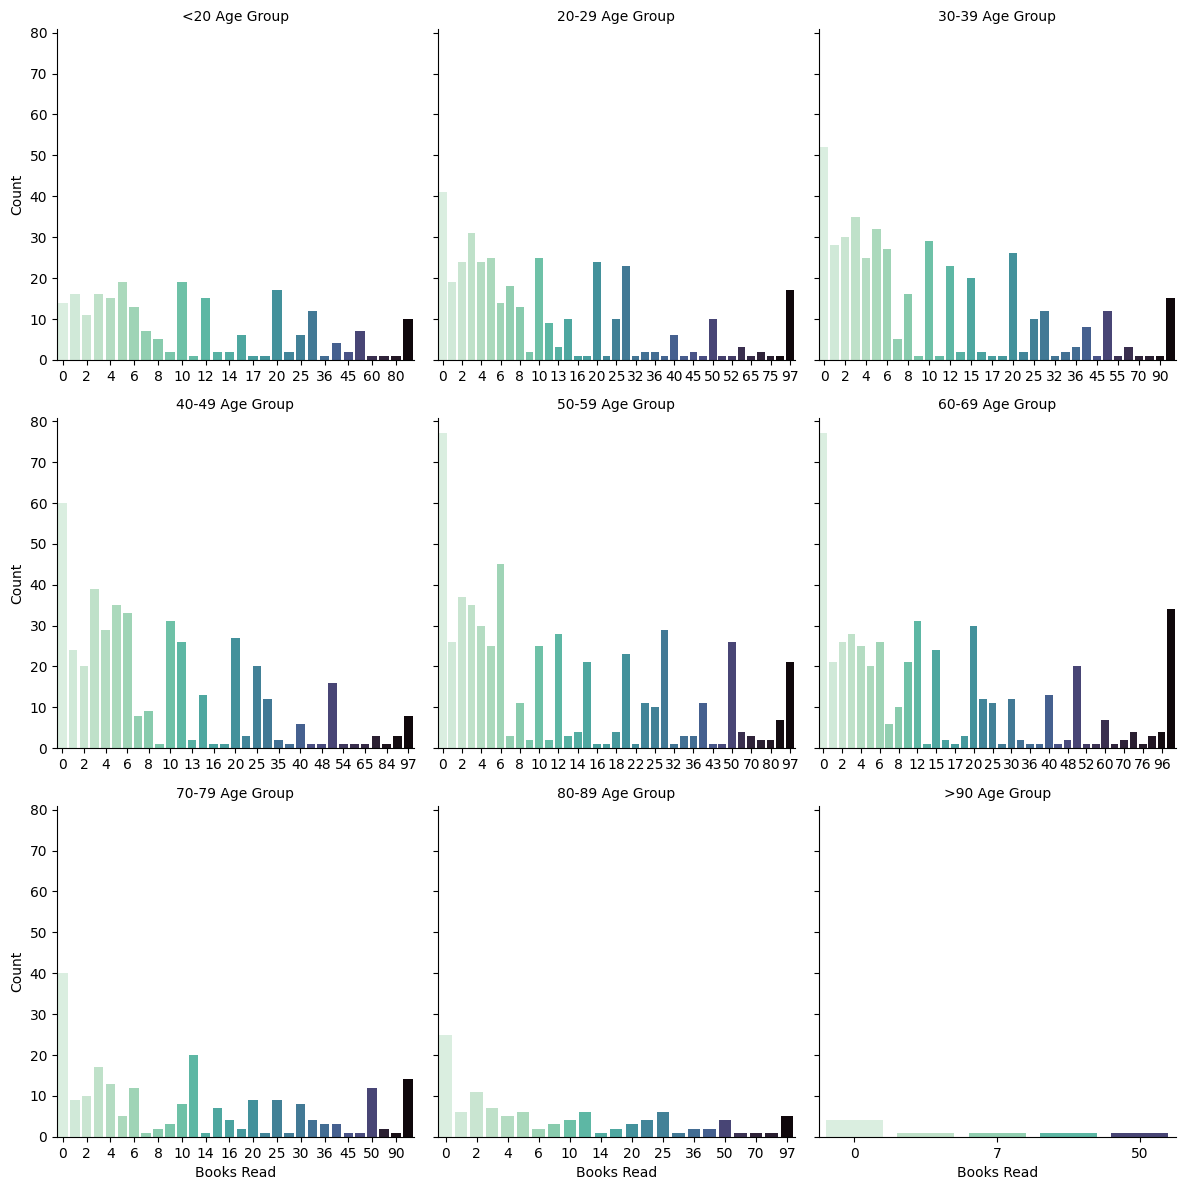

In [ ]:
# Create the FacetGrid
g = sns.FacetGrid(age_df, col="age_group", hue="How many books did you read during last 12months?",
                  col_wrap=3, height=4, palette="mako_r", sharex=False)
#col_wrap = no of plots per row

# Map the countplot to the FacetGrid
g.map(sns.countplot, "How many books did you read during last 12months?")

# Adjust the plot
g.set_titles(col_template="{col_name} Age Group")
g.set_axis_labels("Books Read", "Count")
g.set_xticklabels(step=2) #nightmare!

plt.show()

#### Box Plot:

Ideal for showing the distribution and central tendency (median, quartiles) of the number of books read within each age group.
It highlights the spread and outliers, providing a good sense of the distribution

<ipython-input-50-09fe6f5d7bb3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=age_df,


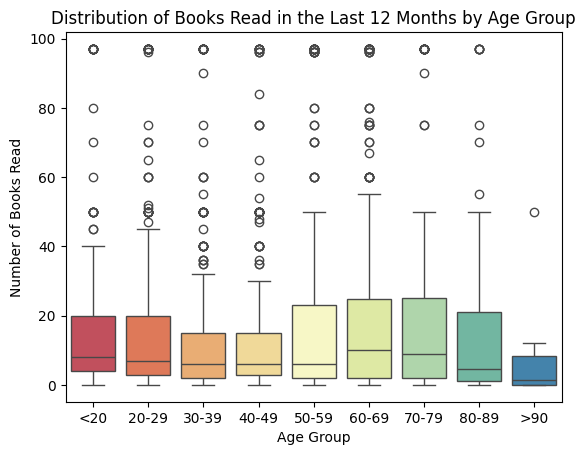

In [ ]:
sns.boxplot(data=age_df,
            x='age_group',
            y='How many books did you read during last 12months?',
            palette='Spectral')
plt.title('Distribution of Books Read in the Last 12 Months by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Books Read')
plt.show()

In [ ]:
# # Create a crosstab
# crosstab = pd.crosstab(reading_habits_clean['How many books did you read during last 12months?'], reading_habits_clean['Sex'])

# # Plot the stacked bar plot
# crosstab.plot(kind='bar', stacked=True, colormap='Spectral', figsize=(10, 6))

# # Adjust plot
# plt.title('Number of Books Read in the Last 12 Months by Gender')

# plt.show()